In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_excel('../file/health_screenings_2020_1000ea.xlsx')
data

,year,city_code,gender,age_code,height,weight,waist,eye_left,eye_right,hear_left,...,serum,AST,ALT,GTP,smoking,drinking,oral_check,dental_caries,tartar,open_date
0,2020,36,1,9,165,60,72.1,1.2,1.5,1,...,1.1,21.0,27.0,21.0,1,0,0,NaN,NaN,2021-12-29
1,2020,27,2,13,150,65,81.0,0.8,0.8,1,...,0.5,18.0,15.0,15.0,1,0,0,NaN,NaN,2021-12-29
2,2020,11,2,12,155,55,70.0,0.6,0.7,1,...,0.7,27.0,25.0,7.0,1,0,0,NaN,NaN,2021-12-29
3,2020,31,1,13,160,70,90.8,1.0,1.0,1,...,1.2,65.0,97.0,72.0,1,0,1,0.0,0.0,2021-12-29
4,2020,41,2,12,155,50,75.2,1.5,1.2,1,...,0.7,18.0,17.0,14.0,1,0,0,NaN,NaN,2021-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2020,48,1,12,165,70,92.0,0.5,0.9,1,...,0.8,21.0,30.0,39.0,3,1,0,NaN,NaN,2021-12-29
996,2020,41,1,12,165,70,88.0,1.2,1.0,1,...,0.7,29.0,37.0,21.0,2,0,1,0.0,0.0,2021-12-29
997,2020,48,2,14,155,55,80.2,0.5,0.6,1,...,0.9,36.0,35.0,34.0,1,1,1,1.0,1.0,2021-12-29
998,2020,41,2,14,150,55,79.5,1.0,1.0,1,...,0.7,30.0,29.0,20.0,1,0,0,NaN,NaN,2021-12-29


In [4]:
data10 = data.loc[:, ['gender', 'height', 'weight', 'waist', 'drinking', 'smoking']]

data10.loc[data10['gender']==1, ['gender']] = 'male'
data10.loc[data10['gender']==2, ['gender']] = 'female'
data10.loc[(data10['smoking']==1)| (data10['smoking']==2), ['smoking']] = 'non-smoking'
data10.loc[data10['smoking']==3, ['smoking']] = 'smoking'

smoking = data10.groupby(['gender', 'smoking'])['smoking'].count()
smoking = smoking.to_frame(name = 'count') # 데이터 프레임화
smoking = smoking.reset_index()

C:\Users\jangy\AppData\Local\Temp\ipykernel_6332\91501167.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'male' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data10.loc[data10['gender']==1, ['gender']] = 'male'
C:\Users\jangy\AppData\Local\Temp\ipykernel_6332\91501167.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'non-smoking' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data10.loc[(data10['smoking']==1)| (data10['smoking']==2), ['smoking']] = 'non-smoking'


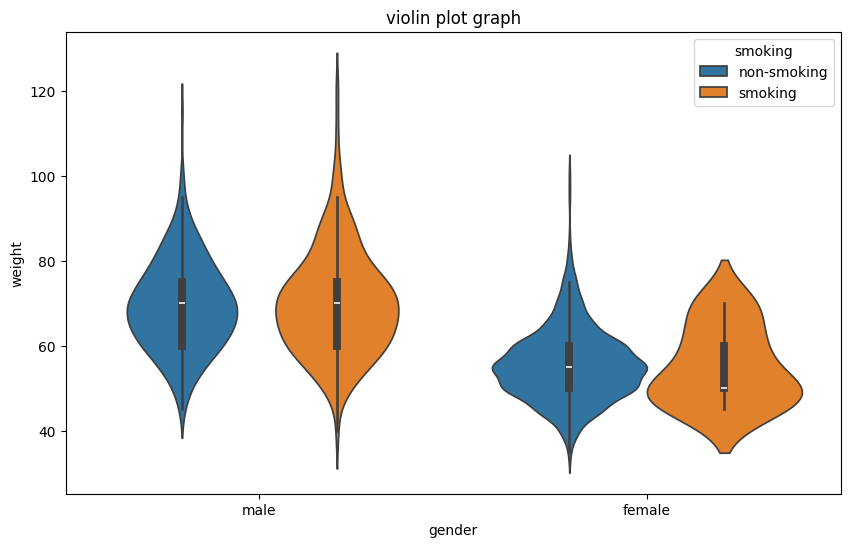

In [6]:
plt.figure(figsize=(10,6))

# 답 (카운트플롯 : 카테고리별로 데이터 개수 세주는 그래프)
sns.violinplot(data=data10, x='gender', y='weight', hue='smoking', order=['male', 'female'])

plt.title('violin plot graph')
plt.show()